In [1]:
from ucimlrepo import fetch_ucirepo 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
  
df = pd.read_csv("Tema_4.csv")

# Análisis Exploratorio

El dataset contiene 4531 filas (registros) y 17 columnas


,Columnas,Tipo de dato,Valores no nulos,Valores nulos,Porcentaje nulos (%)
age,age,object,4305,226,4.99
job,job,object,4305,226,4.99
marital,marital,object,4305,226,4.99
education,education,object,4305,226,4.99
default,default,object,4305,226,4.99
balance,balance,float64,4306,225,4.97
housing,housing,object,4305,226,4.99
loan,loan,object,4304,227,5.01
contact,contact,object,4304,227,5.01
day,day,float64,4304,227,5.01


------------------------- LAS PRIMERAS FILAS DEL DATASET SON -------------------------------


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,unknown_age,unemployed,married,primary,no,1787.0,no,NaN,cellular,19.0,oct,79.0,1.0,-1.0,0.0,unknown,no
1,33.0,services,married,secondary,no,4789.0,yes,yes,cellular,11.0,may,220.0,1.0,339.0,4.0,failure,no
2,35.0,NaN,single,tertiary,no,1350.0,yes,no,cellular,16.0,apr,185.0,1.0,330.0,1.0,failure,no


------------------------- VALORES NULOS DEL DATASET ------------------------


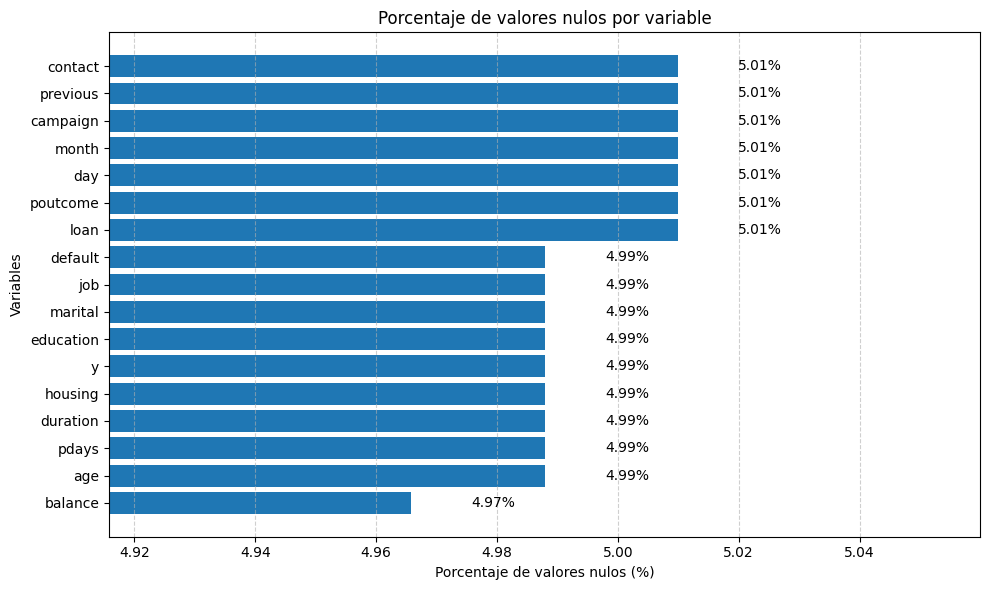


Cantidad de filas con al menos un dato faltante: 2628
Porcentaje de filas con al menos un dato faltante: 58.00%
Total de celdas con valores faltantes: 3848
Porcentaje del total de celdas con valores faltantes: 5.00%

------------------------- DUPLICADOS -------------------------------
Cantidad de filas duplicadas: 10

Porcentaje filas duplicadas: 0.22070183182520414

Las filas duplicadas son las siguientes:


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
4521,28.0,blue-collar,single,secondary,no,416.0,yes,no,unknown,13.0,may,452.0,2.0,-1.0,0.0,unknown,no
4522,30.0,blue-collar,single,secondary,no,2145.0,yes,no,NaN,18.0,may,727.0,2.0,-1.0,0.0,unknown,yes
4523,35.0,admin.,married,secondary,no,8652.0,yes,no,unknown,24.0,jun,103.0,6.0,-1.0,NaN,unknown,no
4524,32.0,entrepreneur,single,tertiary,no,890.0,yes,yes,cellular,28.0,aug,27.0,10.0,-1.0,0.0,unknown,no
4525,33.0,technician,married,secondary,no,0.0,yes,yes,cellular,19.0,nov,163.0,2.0,-1.0,0.0,unknown,no
4526,62.0,management,married,tertiary,no,1859.0,no,NaN,telephone,NaN,aug,245.0,3.0,-1.0,0.0,NaN,yes
4527,NaN,NaN,single,secondary,no,-97.0,yes,no,unknown,6.0,jun,92.0,2.0,-1.0,0.0,unknown,no
4528,39.0,NaN,single,secondary,no,1242.0,yes,no,unknown,12.0,NaN,303.0,NaN,-1.0,0.0,unknown,no
4529,46.0,admin.,single,secondary,no,751.0,yes,no,unknown,13.0,may,104.0,2.0,-1.0,0.0,unknown,no
4530,19.0,student,single,primary,no,103.0,no,no,cellular,10.0,jul,104.0,2.0,-1.0,0.0,unknown,yes


In [3]:
print(f"El dataset contiene {df.shape[0]} filas (registros) y {df.shape[1]} columnas")

filas = df.shape[0]
columnas = df.shape[1]
total_celdas = df.size

info_df = pd.DataFrame({
    'Columnas': df.columns,
    'Tipo de dato': df.dtypes,
    'Valores no nulos': df.notnull().sum(),
    'Valores nulos': df.isnull().sum(),
    'Porcentaje nulos (%)': (df.isnull().sum() / len(df) * 100).round(2)
})

display(info_df)

print("------------------------- LAS PRIMERAS FILAS DEL DATASET SON -------------------------------")
display(df.head(3))

print("------------------------- VALORES NULOS DEL DATASET ------------------------")
porcentaje_nulos = (df.isna().mean() * 100).sort_values()  # cálculo equivalente y claro

plt.figure(figsize=(10,6))
plt.barh(porcentaje_nulos.index, porcentaje_nulos.values)
plt.xlabel('Porcentaje de valores nulos (%)')
plt.ylabel('Variables')
plt.title('Porcentaje de valores nulos por variable')

# etiquetas con 2 decimales
for i, v in enumerate(porcentaje_nulos.values):
    plt.text(v + 0.01, i, f"{v:.2f}%", va='center')

# zoom del eje X para apreciar 4.9–5.1 %
minv, maxv = porcentaje_nulos.min(), porcentaje_nulos.max()
plt.xlim(minv - 0.05, maxv + 0.05)   # ajusta márgenes si querés más/menos zoom
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()

# Métricas globales
num_nan_columna = df.isna().sum()  
porcentaje_nan_columna = (num_nan_columna / filas) * 100

num_nan_filas = df.isna().any(axis=1).sum()
porcentaje_nan_filas = (num_nan_filas / filas) * 100

total_nan = df.isna().sum().sum()
porcentaje_nan_total = (total_nan / total_celdas) * 100

print(f'\nCantidad de filas con al menos un dato faltante: {num_nan_filas}')
print(f'Porcentaje de filas con al menos un dato faltante: {porcentaje_nan_filas:.2f}%')
print(f'Total de celdas con valores faltantes: {total_nan}')
print(f'Porcentaje del total de celdas con valores faltantes: {porcentaje_nan_total:.2f}%\n')

print("------------------------- DUPLICADOS -------------------------------")
num_duplicados = df.duplicated().sum()
porcentaje_duplicados = (num_duplicados / filas) * 100

print(f'Cantidad de filas duplicadas: {num_duplicados}\n')
print(f'Porcentaje filas duplicadas: {porcentaje_duplicados}\n')
print(f'Las filas duplicadas son las siguientes:')
display(df[df.duplicated()])

print("------------------------ DISTRIBUCIÓN Y VARIABILIDAD DE CADA VARIABLE -------------------------")

numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

print("\nVariables numéricas:", list(numeric_cols))
print("Variables categóricas:", list(cat_cols))

print("\nResumen estadístico de variables numéricas:")
display(df[numeric_cols].describe().T)

# Histogramas para variables numéricas
for col in numeric_cols:
    plt.figure(figsize=(6,4))
    plt.hist(df[col].dropna(), bins=20, color='skyblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.show()

# Gráficos de barras para variables categóricas
for col in cat_cols:
    plt.figure(figsize=(6,4))
    df[col].value_counts().plot(kind='bar', color='cornflowerblue', edgecolor='black')
    plt.title(f'Distribución de {col}')
    plt.xlabel(col)
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.grid(axis='y', linestyle='--', alpha=0.6)
    plt.tight_layout()
    plt.show()


print(" ------------------------ RELACIONES Y CORRELACIONES ENTRE LAS DISTINTAS VARIABLES --------------------------------")

num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object', 'category']).columns

# Correlación entre variables numéricas
if len(num_cols) >= 2:
    plt.figure(figsize=(8,6))
    sns.heatmap(df[num_cols].corr(numeric_only=True), annot=True, cmap='Blues', fmt=".2f")
    plt.title('Matriz de correlaciones entre variables numéricas')
    plt.show()
else:
    print("No hay suficientes variables numéricas para calcular correlaciones.")

# Correlación entre variables categóricas
if len(cat_cols) >= 2:
    plt.figure(figsize=(7,5))
    sns.countplot(data=df, x=cat_cols[0], hue=cat_cols[1], palette='Blues')
    plt.title(f'Relación entre {cat_cols[0]} y {cat_cols[1]}')
    plt.xlabel(cat_cols[0])
    plt.ylabel('Frecuencia')
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No hay suficientes variables categóricas para analizar relaciones.")

# Correlación entre variables numéricas y categóricas
if len(num_cols) >= 1 and len(cat_cols) >= 1:
    plt.figure(figsize=(8,5))
    sns.boxplot(data=df, x=cat_cols[0], y=num_cols[0], palette='pastel')
    plt.title(f'Distribución de {num_cols[0]} según {cat_cols[0]}')
    plt.xlabel(cat_cols[0])
    plt.ylabel(num_cols[0])
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()
else:
    print("No hay variables numéricas o categóricas suficientes para el análisis mixto.")


print("---------------------- PATRONES GLOBALES, REDUNDANCIAS Y AGRUPAMIENTOS EN LOS DATOS ---------------------------------")

# Heatmap de correlaciones
plt.figure(figsize=(8,6))
sns.heatmap(df[num_cols].corr(numeric_only=True), cmap='coolwarm', annot=True, fmt=".2f")
plt.title('Correlaciones entre variables numéricas')
plt.show()

# Pairplot (gráfico de dispersión múltiple)
if len(num_cols) >= 3:
    sns.pairplot(df[num_cols], diag_kind='kde', plot_kws={'alpha':0.6})
    plt.suptitle('Relaciones entre variables numéricas', y=1.02)
    plt.show()

